## **EDA**
Com a etapa de limpeza conclu√≠da e os dados devidamente tratados, agora darei in√≠cio √† An√°lise Explorat√≥ria de Dados (EDA). O objetivo desta fase √© compreender melhor o comportamento das vari√°veis, identificar padr√µes, rela√ß√µes e poss√≠veis insights que possam auxiliar nas etapas seguintes do projeto.

A an√°lise ser√° realizada de forma estruturada, dividida em diferentes n√≠veis:

* **An√°lise Univariada:** avalia√ß√£o individual de cada vari√°vel, observando distribui√ß√µes, medidas de tend√™ncia central e dispers√£o.
* **An√°lise Bivariada:** investiga√ß√£o das rela√ß√µes entre duas vari√°veis, buscando poss√≠veis correla√ß√µes e depend√™ncias.
* **Testes de Hip√≥tese:** aplica√ß√£o de testes estat√≠sticos para validar ou rejeitar suposi√ß√µes sobre os dados.
* **An√°lise Multivariada:** estudo conjunto de m√∫ltiplas vari√°veis para identificar padr√µes mais complexos e intera√ß√µes entre elas.

Essa abordagem organizada permitir√° uma compreens√£o mais profunda dos dados e fornecer√° bases s√≥lidas para futuras modelagens e tomadas de decis√£o.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
used_cars = pd.read_csv("../Dados/used_car_train.csv", index_col=0)
used_cars.head()

manufacturer  year  mileage   mpg  accidents_or_damage  one_owner  \
561046       Nissan  2022   7963.0  19.5                  0.0        1.0   
390497         Jeep  2017  65998.0  21.5                  0.0        0.0   
13707         Other  2017  50986.0  29.0                  0.0        0.0   
576420       Nissan  2018  74244.0  28.5                  0.0        0.0   
247684         Ford  2021  18908.0  23.5                  0.0        0.0   

        personal_use_only  driver_rating  driver_reviews_num    price  \
561046                1.0            4.2                19.0  35693.0   
390497                1.0            4.8               335.0  22999.0   
13707                 1.0            4.8                90.0  23900.0   
576420                0.0            4.7               417.0  18988.0   
247684                0.0            4.8                31.0  34189.0   

       transmission_simple color_exterior_simple color_interior_simple  \
561046           Automatic                   red                 black   
390497           Automatic                 white                 black   
13707               Manual                 black                 black   
576420           Automatic                 black                 black   
247684           Automatic                  gray                 black   

       drivetrain_simple fuel_type_simple  
561046               4WD         Gasoline  
390497               4WD         Gasoline  
13707                FWD         Gasoline  
576420               AWD         Gasoline  
247684               RWD         Gasoline

In [3]:
print(f"O dataset apresenta {used_cars.shape[0]} linhas e {used_cars.shape[1]} colunas")

O dataset apresenta 602355 linhas e 15 colunas


In [4]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602355 entries, 561046 to 123772
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   manufacturer           602355 non-null  object 
 1   year                   602355 non-null  int64  
 2   mileage                601981 non-null  float64
 3   mpg                    490753 non-null  float64
 4   accidents_or_damage    583470 non-null  float64
 5   one_owner              577782 non-null  float64
 6   personal_use_only      582957 non-null  float64
 7   driver_rating          577279 non-null  float64
 8   driver_reviews_num     602355 non-null  float64
 9   price                  602355 non-null  float64
 10  transmission_simple    594784 non-null  object 
 11  color_exterior_simple  595345 non-null  object 
 12  color_interior_simple  557615 non-null  object 
 13  drivetrain_simple      585705 non-null  object 
 14  fuel_type_simple       584692 non-nu

In [5]:
used_cars.describe()

year       mileage            mpg  accidents_or_damage  \
count  602355.000000  6.019810e+05  490753.000000        583470.000000   
mean     2017.788382  5.577203e+04      24.608405             0.228013   
std         5.119842  4.355324e+04       6.523284             0.419552   
min      1915.000000  0.000000e+00       0.000000             0.000000   
25%      2016.000000  2.327900e+04      21.000000             0.000000   
50%      2019.000000  4.560900e+04      24.000000             0.000000   
75%      2021.000000  7.830300e+04      28.000000             0.000000   
max      2024.000000  1.119067e+06     127.500000             1.000000   

           one_owner  personal_use_only  driver_rating  driver_reviews_num  \
count  577782.000000      582957.000000  577279.000000       602355.000000   
mean        0.562667           0.657211       4.623896           89.716016   
std         0.496058           0.474642       0.276561          115.377022   
min         0.000000           0.000000       1.000000            0.000000   
25%         0.000000           0.000000       4.500000           13.000000   
50%         1.000000           1.000000       4.700000           51.000000   
75%         1.000000           1.000000       4.800000          119.000000   
max         1.000000           1.000000       5.000000         1025.000000   

              price  
count  6.023550e+05  
mean   3.254244e+04  
std    2.720058e+04  
min    1.000000e+00  
25%    1.959500e+04  
50%    2.798900e+04  
75%    3.947700e+04  
max    8.888889e+06

In [6]:
used_cars.select_dtypes(include="object").describe()

manufacturer transmission_simple color_exterior_simple  \
count        602355              594784                595345   
unique           16                   3                     7   
top           Other           Automatic                 white   
freq         140339              550550                142350   

       color_interior_simple drivetrain_simple fuel_type_simple  
count                 557615            585705           584692  
unique                     6                 5                5  
top                    black               FWD         Gasoline  
freq                  371829            195981           510039

Ap√≥s a anailise dos dados acima, vemos que os dados est√£o prontos para as an√°lises. Irei come√ßar pela an√°lise univariada.

# An√°lise Univariada

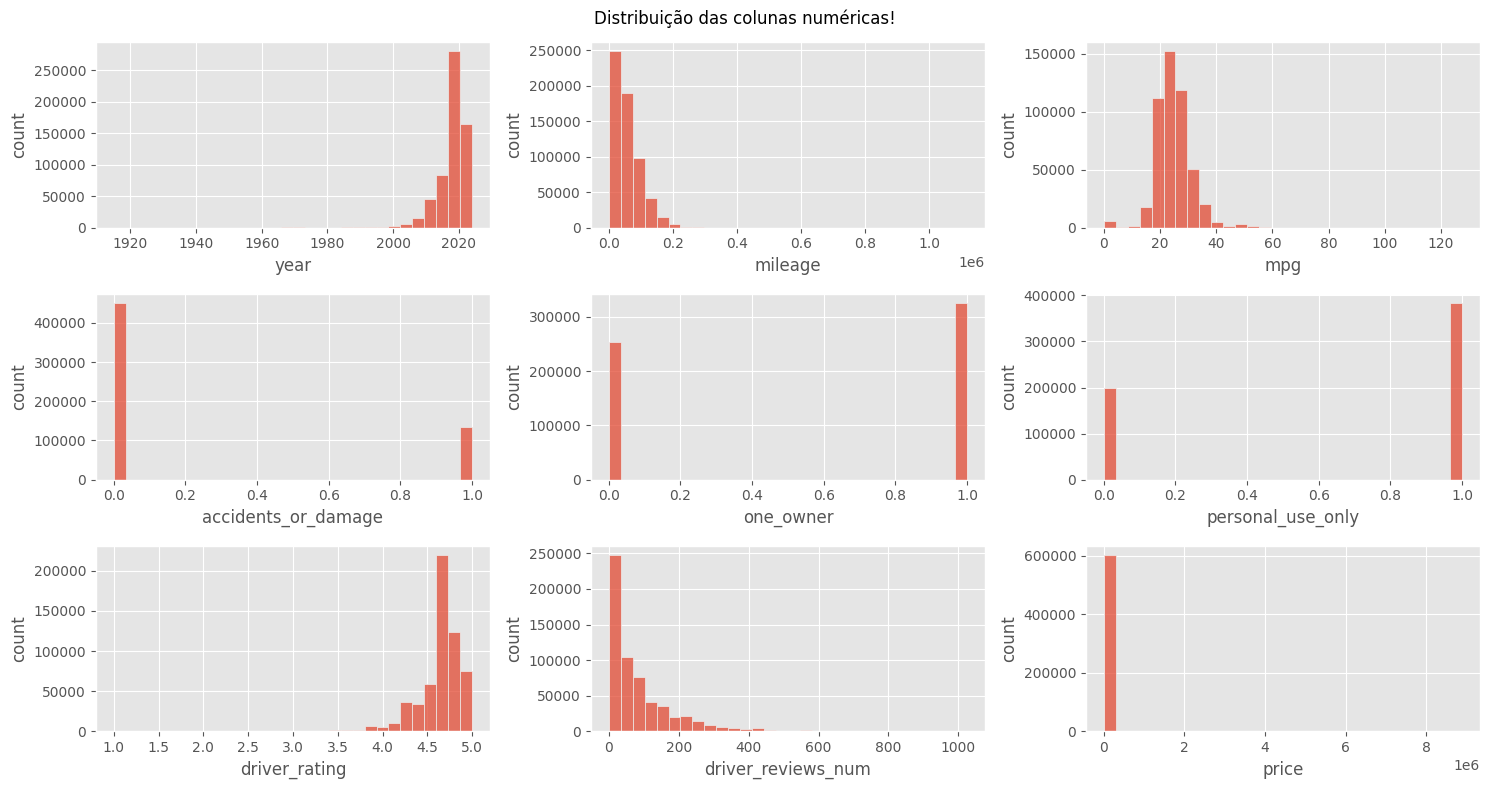

In [7]:
colunas_numericas = used_cars.select_dtypes(include="number").columns
plt.style.use("ggplot")
fig, axes = plt.subplots(figsize=(15, 8), ncols=3, nrows=3)
axes=axes.flatten()
plt.suptitle("Distribui√ß√£o das colunas num√©ricas!")
for i, col in enumerate(colunas_numericas):
    sns.histplot(used_cars[col], bins=30, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("count")
    
plt.tight_layout()
plt.show()



Ap√≥s a an√°lise dos dados, observamos que:

* O dataset apresenta mais **carros recentes** do que antigos. No entanto, h√° um carro bem antigo que gerou um **outlier √† esquerda**, deixando a distribui√ß√£o assim√©trica.
* Tamb√©m percebemos que a maioria dos carros possui **baixa quilometragem**, mas existe um caso com quilometragem extremamente alta (1.000.000 km), o que merece uma an√°lise mais detalhada.
* A maioria dos carros **n√£o sofreu acidentes**, **teve apenas um dono** e foi utilizada **principalmente para uso pessoal**.
* As **notas dos motoristas** tamb√©m s√£o satisfat√≥rias, geralmente entre 4 e 5.
* Alguns carros possuem **muitas avalia√ß√µes** (entre 200 e 400), mas h√° casos excepcionais com at√© 1000 reviews.
* O **pre√ßo** apresenta o comportamento esperado, mas alguns carros possuem valores extremamente altos, configurando outliers que podem comprometer o desempenho de modelos de **clusteriza√ß√£o** e **regress√£o**.

Dessa forma, ser√° necess√°rio analisar os carros com pre√ßos acima de **1 milh√£o** para verificar se esses valores s√£o plaus√≠veis ou se devem ser tratados como inconsist√™ncias.

In [8]:
used_cars[used_cars["price"]> 1000000]

manufacturer  year   mileage   mpg  accidents_or_damage  one_owner  \
613079          Other  2004    4376.0  13.0                  0.0        0.0   
540908  Mercedes-Benz  2009     650.0  14.0                  0.0        0.0   
244466           Ford  2017   78920.0  22.0                  NaN        NaN   
49078             BMW  1996  121043.0  17.5                  0.0        0.0   
213644           Ford  2020    1054.0   NaN                  0.0        1.0   
615573          Other  2019     134.0  21.5                  0.0        1.0   
613085          Other  2005     780.0  13.0                  0.0        0.0   
84358           Other  1963      76.0   NaN                  1.0        NaN   
213658           Ford  2019     255.0   NaN                  0.0        0.0   
636956          Other  2017   83000.0   NaN                  NaN        NaN   
213659           Ford  2018       9.0   NaN                  0.0        1.0   
613081          Other  2005   12996.0  13.0                  0.0        0.0   
613084          Other  2005    9610.0  13.0                  0.0        0.0   
224571           Ford  2016       NaN  18.5                  1.0        1.0   
609009          Other  2015    2622.0  22.0                  0.0        0.0   
616430          Other  1994    2370.0  17.0                  0.0        0.0   
91190           Other  2006  158021.0   NaN                  0.0        0.0   

        personal_use_only  driver_rating  driver_reviews_num      price  \
613079                1.0            4.3                 2.0  1549991.0   
540908                1.0            4.3                 2.0  1150000.0   
244466                NaN            NaN                 0.0  1111111.0   
49078                 1.0            4.7                 2.0  1750000.0   
213644                1.0            NaN                 0.0  1149900.0   
615573                1.0            4.9                13.0  1200888.0   
613085                0.0            4.5                 5.0  2250000.0   
84358                 1.0            NaN                 0.0  4999999.0   
213658                0.0            NaN                 0.0  1275000.0   
636956                NaN            NaN                 0.0  3490000.0   
213659                1.0            NaN                 0.0  1575000.0   
613081                1.0            4.5                 5.0  1499177.0   
613084                0.0            4.5                 5.0  1650000.0   
224571                0.0            NaN                 0.0  8888889.0   
609009                1.0            3.9                 5.0  2099995.0   
616430                0.0            4.9                 1.0  1350000.0   
91190                 1.0            4.6                79.0  1111111.0   

       transmission_simple color_exterior_simple color_interior_simple  \
613079              Manual                silver                 other   
540908           Automatic                  gray                   NaN   
244466           Automatic                 white                 black   
49078            Automatic                 black                 black   
213644           Automatic                 black                   NaN   
615573              Manual                 black                 black   
613085              Manual                silver                  gray   
84358            Automatic                 black                  gray   
213658           Automatic                   red                   NaN   
636956           Automatic                 white                   NaN   
213659           Automatic                   red                   NaN   
613081              Manual                  gray                 other   
613084              Manual                   red                  gray   
224571           Automatic                 other                   NaN   
609009              Manual                 black                   NaN   
616430              Manual                   red   

#### üìä Vis√£o Geral do Dataset
- **Total de registros analisados**: 17 carros com pre√ßo > $1.000.000
- **Percentual do dataset total**: ‚âà 0,0028% (17 de ~600.000 registros)

---

#### üéØ Decis√£o de Tratamento

##### ‚úÖ **CARROS A MANTER** (11 registros)
**Motivo**: Carros ex√≥ticos, de cole√ß√£o ou edi√ß√µes especiais com valores condizentes com o mercado

| Manufacturer | Modelo | Ano | Pre√ßo | Motivo da Manuten√ß√£o |
|--------------|--------|-----|-------|---------------------|
| Porsche | Carrera GT Base (M6) | 2004 | $1.549.991 | Supercarro raro, valor de mercado |
| Mercedes-Benz | SLR McLaren | 2009 | $1.150.000 | Supercarro, quilometragem baixa |
| Porsche | 911 Turbo S | 2019 | $1.200.888 | Supercarro moderno, quase zero km |
| Porsche | Carrera GT | 2005 | $2.250.000 | Supercarro raro, valor apropriado |
| Ford | GT | 2020 | $1.149.900 | Supercarro, baixa quilometragem |
| Ford | GT | 2019 | $1.275.000 | Supercarro, valor condizente |
| Ford | GT EDITION VIN 002 | 2018 | $1.575.000 | Edi√ß√£o especial, quase zero km |
| Porsche | Carrera GT | 2005 | $1.499.177 | Supercarro, valor realista |
| Porsche | Carrera GT | 2005 | $1.650.000 | Supercarro, baixa quilometragem |
| Porsche | 918 Spyder Base (PDK) | 2015 | $2.099.995 | H√≠brido, supercarro raro |
| Porsche | 911 Turbo 3.6 | 1994 | $1.350.000 | Cl√°ssico colecion√°vel |

---

##### ‚ùå **CARROS A REMOVER** (6 registros)
**Motivo**: Valores claramente inconsistentes, erros de digita√ß√£o ou dados implaus√≠veis

| Manufacturer | Modelo | Ano | Pre√ßo | Motivo da Remo√ß√£o |
|--------------|--------|-----|-------|------------------|
| Ford | Sedan Police Interceptor Base | 2017 | $1.111.111 | Carro de pol√≠cia usado, valor deveria ser ~$20k |
| Cadillac | DeVille 77 HOURS ON ENGINES | 1963 | $4.999.999 | Valor absurdo para modelo comum |
| RAM | ProMaster 3500 High Roof | 2017 | $3.490.000 | Van comercial, valor deveria ser ~$30k |
| Cadillac | DTS | 2006 | $1.111.111 | Sedan comum com alta quilometragem |
| Ford | Utility Police Interceptor Base | 2016 | $8.888.889 | Padr√£o num√©rico repetitivo (erro claro) |
| BMW | 750 iL | 1996 | $1.750.000 | **Erro prov√°vel de digita√ß√£o** (deveria ser $175k) |


In [9]:
# Primeiro: remover os casos √≥bvios por ID
ids_obvios = [244466, 84358, 91190, 224571]
used_car_clean = used_cars[~used_cars.index.isin(ids_obvios)]

# Segundo: remover outros padr√µes problem√°ticos
padroes_problematicos = (
    (used_car_clean['manufacturer'] == 'RAM') & 
    (used_car_clean['price'] > 100000)
)

used_car_clean = used_car_clean[~padroes_problematicos]

# Terceiro: verificar o BMW separadamente (corrigir em vez de remover)
bmw_anomalo = used_car_clean[
    (used_car_clean['manufacturer'] == 'BMW') & 
    (used_car_clean['price'] > 1000000)
]

if not bmw_anomalo.empty:
    # Corrigir o pre√ßo (provavelmente erro de digita√ß√£o - $175,000 em vez de $1,750,000)
    used_car_clean.loc[bmw_anomalo.index, 'price'] = 175000.0
    print("Pre√ßo do BMW corrigido de $1.750.000 para $175.000")

print(f"Total de registros removidos: {len(used_cars) - len(used_car_clean)}")
print(f"Dataset limpo: {len(used_car_clean)} registros")

Pre√ßo do BMW corrigido de $1.750.000 para $175.000
Total de registros removidos: 4
Dataset limpo: 602351 registros


A vari√°vel mpg (miles per gallon) representa a efici√™ncia de combust√≠vel dos carros, ou seja, quantas milhas o ve√≠culo percorre por gal√£o de combust√≠vel. Quanto maior o valor, mais econ√¥mico √© o carro. Ao analisar essa vari√°vel, foi identificado um registro com valor 120 mpg, enquanto a maioria dos ve√≠culos apresenta valores que n√£o ultrapassam 28 mpg. Esse ponto destoa bastante do padr√£o esperado e, portanto, pode ser considerado um outlier.

In [10]:
outlier_mpg=used_car_clean[used_car_clean["mpg"]>80]
outlier_mpg


manufacturer  year   mileage    mpg  accidents_or_damage  one_owner  \
232743         Ford  2019  128081.0  127.5                  1.0        0.0   
218504         Ford  2019   20100.0  127.5                  0.0        1.0   
735840   Volkswagen  2019   53265.0  118.5                  0.0        0.0   
694495       Toyota  2018   34122.0  121.0                  1.0        1.0   
722315       Toyota  2015  141189.0  102.0                  0.0        1.0   
23099         Other  2022    7126.0   94.5                  0.0        1.0   
220411         Ford  2020  115001.0  127.5                  0.0        0.0   
23123         Other  2022    4482.0   94.5                  0.0        1.0   
722235       Toyota  2012  138088.0  102.0                  0.0        0.0   
23128         Other  2022    2343.0   94.5                  0.0        1.0   
694524       Toyota  2018   53642.0  121.0                  0.0        1.0   
23130         Other  2022    3795.0   94.5                  0.0        1.0   
24339         Other  2016   93087.0   86.0                  0.0        0.0   
23121         Other  2022    7413.0   94.5                  0.0        1.0   
23126         Other  2022    1159.0   94.5                  0.0        1.0   
169253        Dodge  2007  403246.0  127.5                  1.0        0.0   
23129         Other  2022    3729.0   94.5                  0.0        1.0   
23114         Other  2022    1516.0   94.5                  0.0        1.0   
708137       Toyota  2021    2899.0  121.0                  0.0        1.0   
23098         Other  2022    6019.0   94.5                  0.0        1.0   
223948         Ford  2013  117750.0   81.0                  0.0        1.0   

        personal_use_only  driver_rating  driver_reviews_num    price  \
232743                0.0            5.0                 2.0  36995.0   
218504                1.0            4.5               101.0  83990.0   
735840                1.0            4.5               259.0  19790.0   
694495                1.0            4.6                48.0  23874.0   
722315                0.0            4.5                 7.0  13999.0   
23099                 1.0            4.2                 2.0  59640.0   
220411                0.0            4.8                 2.0  49990.0   
23123                 1.0            4.2                 2.0  55950.0   
722235                1.0            4.5                30.0  12500.0   
23128                 1.0            4.2                 2.0  54453.0   
694524                0.0            4.6                48.0  28995.0   
23130                 0.0            4.2                 2.0  51966.0   
24339                 0.0            4.5                14.0  17980.0   
23121                 1.0            4.2                 2.0  57149.0   
23126                 1.0            4.2                 2.0  61044.0   
169253                1.0            4.5                15.0  16995.0   
23129                 1.0            4.2                 2.0  47500.0   
23114                 1.0            4.2                 2.0  52994.0   
708137                1.0            4.6                18.0  28999.0   
23098                 1.0            4.2                 2.0  54950.0   
223948                1.0            4.2                20.0   9995.0   

       transmission_simple color_exterior_simple color_interior_simple  \
232743           Automatic                 white                  gray   
218504              Manual                 black                 black   
735840           Automatic                  blue                 black   
694495           Automatic                 other                 black   
722315           Automatic                silver                  gray   
23099            Automatic                 black                 black   
220411              Manual                 white                 black   
23123            Automatic                 black                 black   
722235           

Na an√°lise da vari√°vel mpg, foram identificados alguns registros com valores acima de 80, o que √© fisicamente improv√°vel, considerando que a maioria dos ve√≠culos apresenta consumo at√© cerca de 28 mpg. Al√©m disso, mesmo os recordes mundiais de efici√™ncia atingidos por ve√≠culos h√≠bridos, como o Toyota Prius, registraram m√©dias em torno de 93,158 mpg, o que demonstra que valores muito acima desse patamar representam carros invi√°veis na pr√°tica. Como esses registros representam uma fra√ß√£o muito pequena do dataset (menos de 1%), optou-se por remover esses outliers, garantindo que os dados reflitam situa√ß√µes plaus√≠veis de consumo e n√£o distor√ßam a modelagem.

In [11]:
used_car_clean=used_car_clean[used_car_clean["mpg"]<80]

Tamb√©m foi identificado um outlier na vari√°vel mileage, com valores acima de 1.000.000 km, que podem representar um erro de registro ou casos extremos de ve√≠culos com uso muito intenso. Para tratar isso de forma criteriosa, irei filtrar os carros com quilometragem acima de 500.000 km e analisar cada registro, avaliando se devem ser removidos, corrigidos ou mantidos na base.

In [12]:
used_car_clean[used_car_clean["mileage"]>=5e+05]

manufacturer  year    mileage   mpg  accidents_or_damage  one_owner  \
701619         Toyota  2010   544999.0  30.5                  0.0        0.0   
302334          Honda  2020   754680.0  23.0                  0.0        1.0   
552522          Other  2009   514317.0  23.5                  1.0        0.0   
157346          Other  2021   724500.0  23.5                  0.0        1.0   
756847          Other  2010  1119067.0  19.0                  0.0        0.0   
316531          Honda  2006   543099.0  18.5                  1.0        1.0   
121155      Chevrolet  2018   653132.0  29.0                  0.0        1.0   
76422           Other  1998   999999.0  23.5                  0.0        0.0   
481170          Lexus  2014   680094.0  23.5                  NaN        NaN   
319941          Honda  2013   938032.0  33.5                  0.0        0.0   
304515          Honda  2005   516000.0  19.5                  0.0        0.0   
669643         Toyota  2020   769938.0  33.5                  1.0        1.0   
456962          Other  2016   644736.0  20.0                  0.0        0.0   
531797  Mercedes-Benz  2019   566517.0  26.5                  1.0        1.0   
522994  Mercedes-Benz  2021   915383.0  26.0                  0.0        0.0   

        personal_use_only  driver_rating  driver_reviews_num    price  \
701619                1.0            4.5               187.0  13995.0   
302334                1.0            4.3               156.0  20499.0   
552522                0.0            4.4                21.0   4500.0   
157346                0.0            5.0                 1.0  20491.0   
756847                1.0            4.3                17.0  16997.0   
316531                1.0            4.6               103.0   6999.0   
121155                1.0            4.6               206.0  15287.0   
76422                 1.0            4.1                11.0   1995.0   
481170                NaN            4.7                70.0  21700.0   
319941                1.0            4.6               287.0  14816.0   
304515                1.0            4.6                68.0   5160.0   
669643                1.0            4.7               147.0  21825.0   
456962                1.0            4.6                41.0  34777.0   
531797                1.0            4.8                41.0  35955.0   
522994                0.0            4.7                 7.0  53539.0   

       transmission_simple color_exterior_simple color_interior_simple  \
701619           Automatic                 black                  gray   
302334           Automatic                 white                 black   
552522           Automatic                 other                  gray   
157346           Automatic                 black                 black   
756847           Automatic                 black                 beige   
316531           Automatic                 black                  gray   
121155           Automatic                silver                 black   
76422            Automatic                 other                   red   
481170           Automatic                 white                   NaN   
319941           Automatic                  blue                 black   
304515           Automatic                  blue                  gray   
669643           Automatic                  gray                 other   
456962           Automatic                   red                 black   
531797           Automatic                  gray                   NaN   
522994           Automatic                 white                 beige   

       drivetrain_simple fuel_type_simple  
701619               FWD         Gasoline  
302334               FWD         Gasoline  
552522               FWD         Gasoline  
157346               FWD         Gasoline  
756847               AWD         Gasoline  
316531               4WD         Gasoline  
121155               FWD         Gasoline  
76422                F

Observa-se que o dataset cont√©m ve√≠culos com quilometragem muito alta, que fogem do padr√£o da maioria dos carros usados. Como n√£o √© poss√≠vel confirmar se esses valores s√£o erros de registro ou dados reais, optou-se por manter esses registros na base, garantindo que nenhum dado potencialmente v√°lido seja removido de forma arbitr√°ria.

Irei continuar na analise univariada, mas com as variaveis categ√≥ricas.

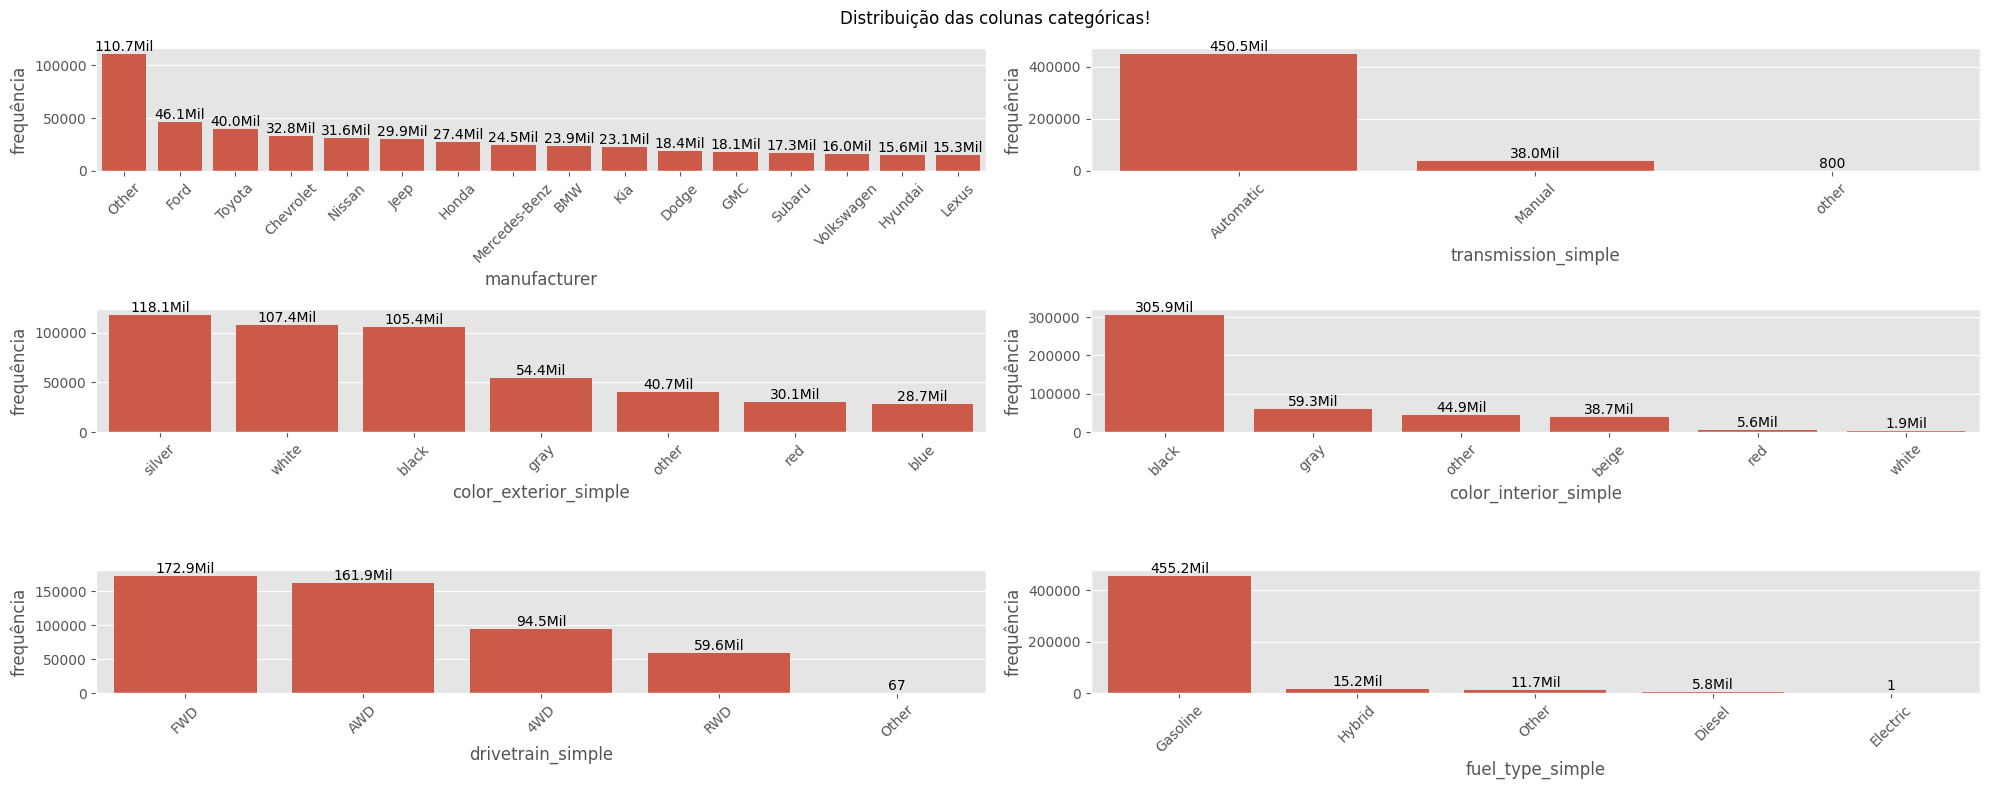

In [13]:
colunas_categoricas = used_car_clean.select_dtypes(include="object").columns
fig, axes = plt.subplots(figsize=(20, 8), ncols=2, nrows=3)
axes=axes.flatten()
plt.suptitle("Distribui√ß√£o das colunas categ√≥ricas!")
for i, col in enumerate(colunas_categoricas):
    freq_colunas_cat = used_car_clean[col].value_counts().reset_index()
    freq_colunas_cat.columns = [col, "frequ√™ncia"]
    sns.barplot(freq_colunas_cat, x=col, y="frequ√™ncia", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("frequ√™ncia")
    axes[i].set_xticks(rotation=45, ticks = freq_colunas_cat[col], labels = freq_colunas_cat[col])
    for j, v in enumerate(freq_colunas_cat["frequ√™ncia"]):
        v_str = str(v)
        if v > 1000:
            v_str=f"{int(v)/1000:.1f}Mil"
        else:
            pass
        axes[i].text(j, v, v_str, ha="center", va="bottom")
    
    
    
plt.tight_layout()
plt.show()


Ap√≥s a an√°lise dos dados, podemos destacar algumas tend√™ncias importantes que refletem o mercado de ve√≠culos:

* **Manufacturer**: Ford, Toyota e Chevrolet aparecem como as marcas mais representativas da base. Marcas menos frequentes foram agrupadas como **Other**, o que mostra que o mercado √© concentrado em algumas fabricantes populares.
* **Transmission**: A predomin√¢ncia de ve√≠culos **Automatic** reflete a tend√™ncia do mercado atual, em que a maioria dos consumidores prefere c√¢mbios autom√°ticos pela praticidade.
* **Color Exterior**: As cores mais comuns, **silver**, **white** e **black**, indicam uma prefer√™ncia do mercado por tons neutros e vers√°teis, que costumam ter maior valoriza√ß√£o na revenda.
* **Color Interior**: O interior **black** √© o mais frequente, refor√ßando a prefer√™ncia por cores que combinam com diferentes estilos de carroceria e exigem menor manuten√ß√£o visual.
* **Drivetrain**: **FWD** e **AWD** s√£o os tipos de tra√ß√£o mais utilizados, refletindo a predomin√¢ncia de ve√≠culos urbanos e SUVs no mercado atual.
* **Fuel Type**: A **gasolina** domina como combust√≠vel principal, indicando que, apesar do crescimento de h√≠bridos e el√©tricos, o mercado ainda √© majoritariamente movido a combust√≠veis f√≥sseis.

Finalizando a parte da analise univariada, irei partir para analise bivariada, relacionando as features com a target(price)


## An√°lise Bivariada

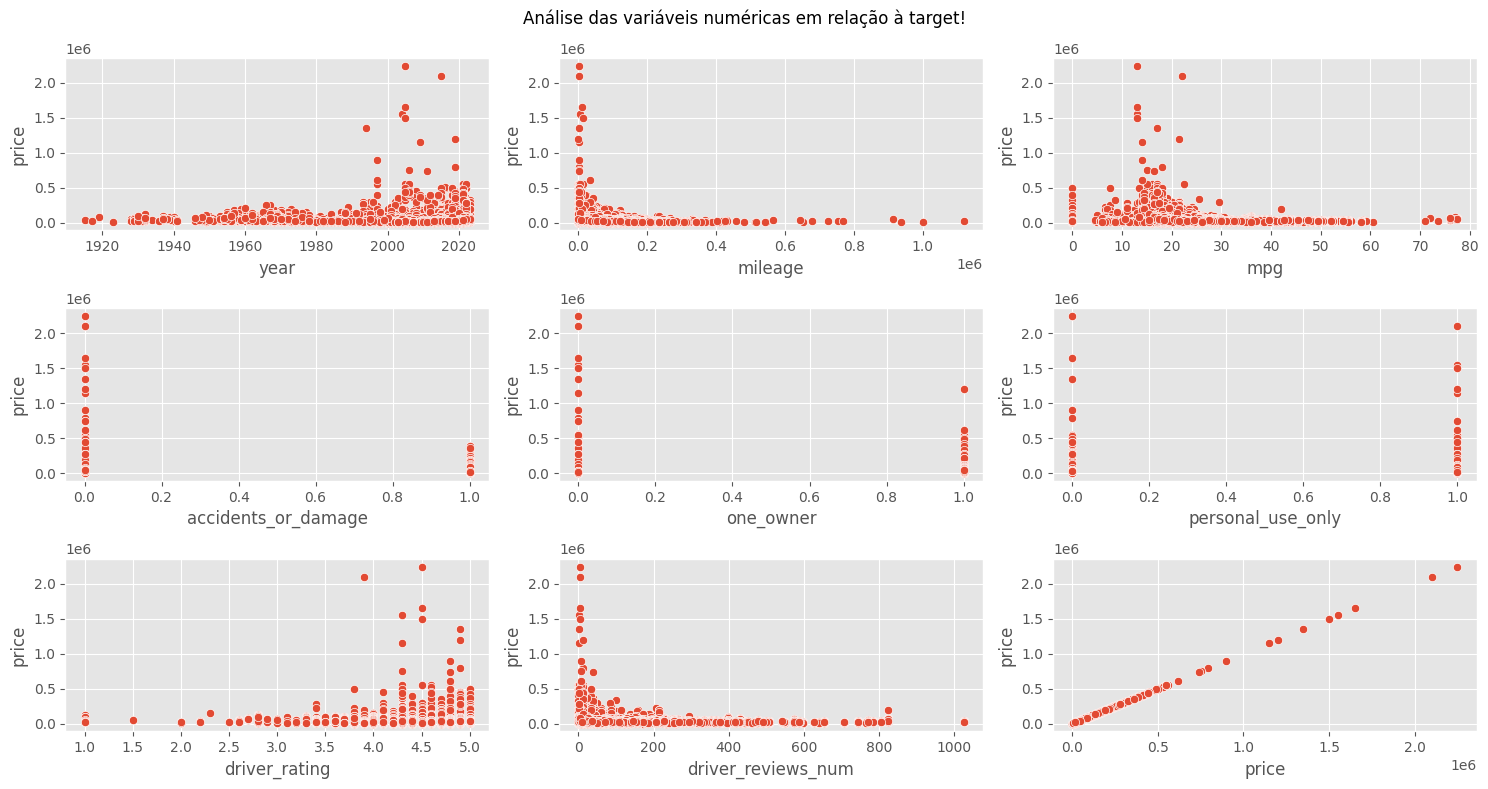

In [14]:

fig, axes = plt.subplots(figsize=(15, 8), ncols=3, nrows=3)
axes=axes.flatten()
plt.suptitle("An√°lise das vari√°veis num√©ricas em rela√ß√£o √† target!")
for i, col in enumerate(colunas_numericas):
    sns.scatterplot(x=used_car_clean[col], y=used_car_clean["price"], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("price")
    
plt.tight_layout()
plt.show()


#### Observa√ß√µes por vari√°vel:

1. **year √ó price**

   * Carros mais novos (ap√≥s ~2000) tendem a ter maior pre√ßo.
   * H√° outliers de carros antigos muito caros (provavelmente carros de cole√ß√£o).

2. **mileage √ó price**

   * Quanto maior a quilometragem, menor o pre√ßo (rela√ß√£o inversa clara).
   * Poucos casos de carros com alta quilometragem e pre√ßo elevado ‚Üí provavelmente outliers/erros.

3. **mpg √ó price**

   * Muitos carros concentrados entre 10‚Äì30 mpg.
   * Pre√ßos altos n√£o parecem seguir padr√£o forte com mpg, mas carros de consumo extremo (muito baixo ou muito alto mpg) n√£o t√™m pre√ßos elevados.

4. **accidents_or_damage √ó price**

   * Carros sem acidentes (0) apresentam grande varia√ß√£o de pre√ßo, inclusive os mais caros.
   * Carros com registro de acidente/dano (1) t√™m pre√ßos mais baixos (faz sentido).

5. **one_owner √ó price**

   * Tend√™ncia de pre√ßos maiores em carros com √∫nico dono (1).
   * Mas h√° dispers√£o: n√£o √© regra absoluta.

6. **personal_use_only √ó price**

   * Carros de uso pessoal (1) apresentam mais dispers√£o e incluem alguns pre√ßos altos.
   * Carros de uso n√£o-pessoal (0) parecem concentrar pre√ßos mais baixos.

7. **driver_rating √ó price**

   * Correla√ß√£o positiva: carros com maior nota tendem a valer mais.
   * A dispers√£o cresce com a nota, mas nota alta parece associada a pre√ßos mais altos.

8. **driver_reviews_num √ó price**

   * Muitos ve√≠culos com poucas reviews e pre√ßos variados.
   * Poucos ve√≠culos com muitas reviews ‚Üí e nesses casos, em geral pre√ßos mais baixos (provavelmente carros populares).

#### Conclus√µes principais:

* **Fatores que mais influenciam positivamente o pre√ßo:**

  * Ano de fabrica√ß√£o (quanto mais novo, maior o pre√ßo).
  * Boa avalia√ß√£o do motorista (**driver_rating**).
  * √önico dono (**one_owner = 1**).

* **Fatores que reduzem pre√ßo:**

  * Alta quilometragem.
  * Acidentes/danos registrados.
  * Muitas reviews (indicando popularidade de carros mais baratos).

* **Fatores neutros/fracos:**

  * Consumo (mpg) n√£o mostra rela√ß√£o clara.
  * Uso pessoal vs. n√£o-pessoal mostra diferen√ßa, mas menos significativa.


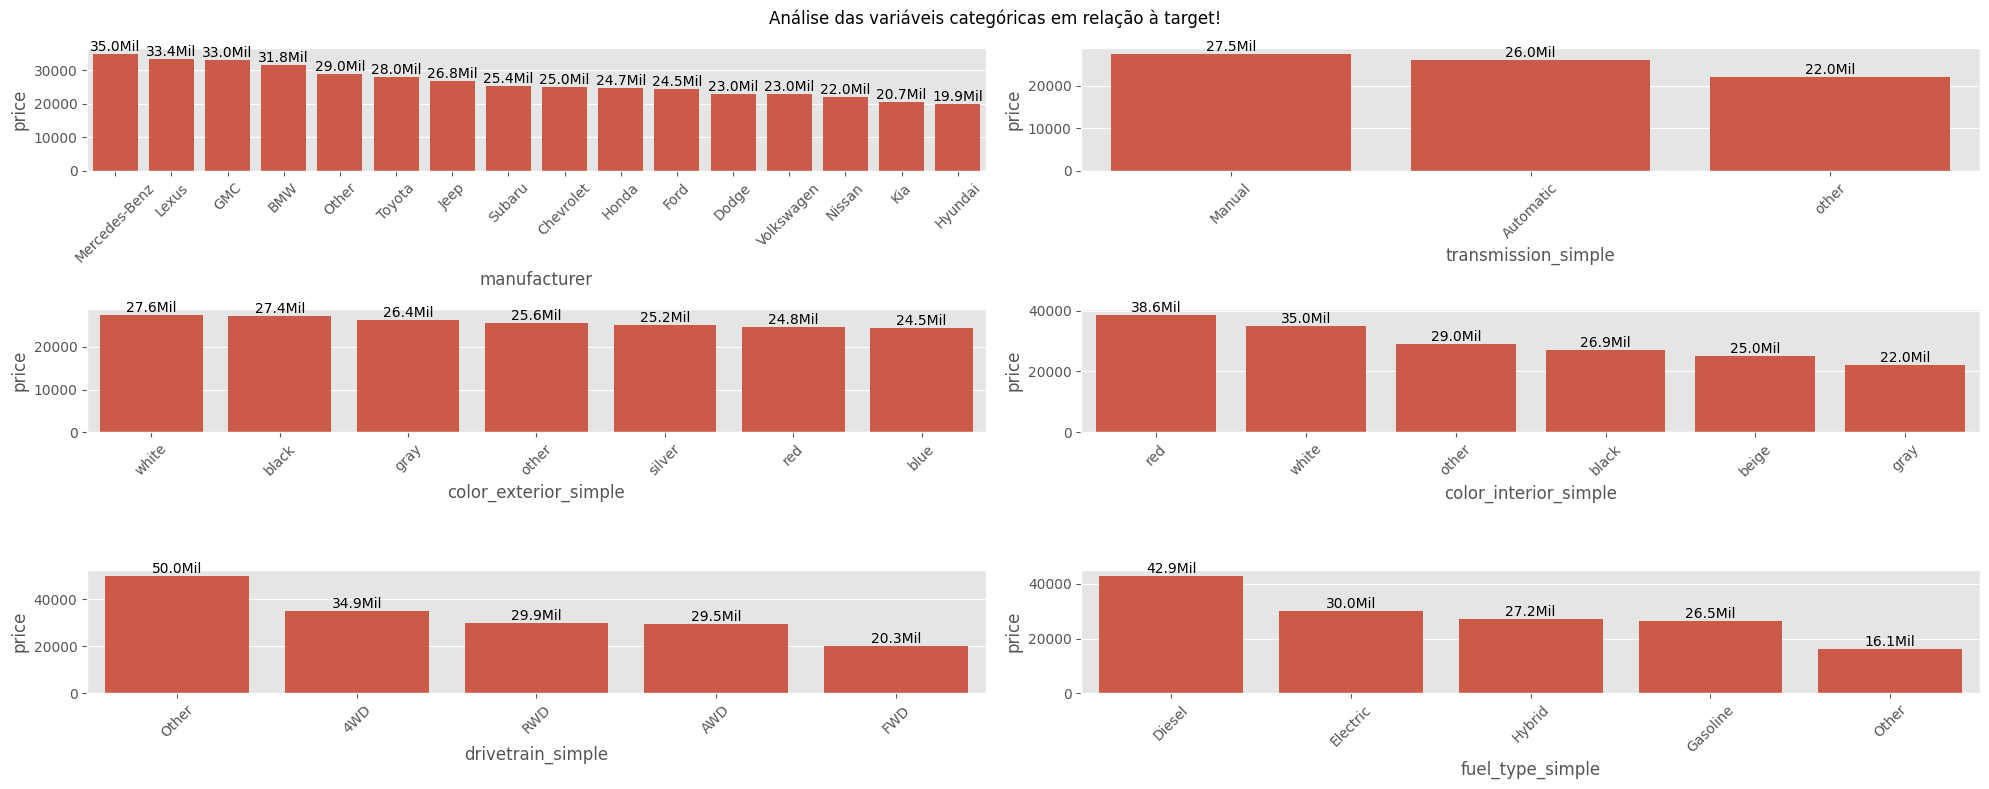

In [15]:
fig, axes = plt.subplots(figsize=(20, 8), ncols=2, nrows=3)
axes=axes.flatten()
plt.suptitle("An√°lise das vari√°veis categ√≥ricas em rela√ß√£o √† target!")
for i, col in enumerate(colunas_categoricas):
    cat_precos = used_car_clean[[col, "price"]].groupby(col).median().reset_index().sort_values(by="price", ascending=False)
    cat_precos.columns = [col, "Mediana de pre√ßos"]
    sns.barplot(x=cat_precos[col], y=cat_precos["Mediana de pre√ßos"], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("price")
    axes[i].set_xticks(rotation=45, ticks = cat_precos[col], labels = cat_precos[col])
    for j, v in enumerate(cat_precos["Mediana de pre√ßos"]):
        v_str = str(v)
        if v > 1000:
            v_str=f"{int(v)/1000:.1f}Mil"
        else:
            pass
        axes[i].text(j, v, v_str, ha="center", va="bottom")
    
plt.tight_layout()
plt.show()



Na an√°lise, utilizei a **mediana** em vez da m√©dia, pois observamos a presen√ßa de **outliers** que poderiam distorcer a m√©dia. A mediana nos d√° uma vis√£o mais robusta do comportamento t√≠pico dos pre√ßos. Alguns insights interessantes surgem a partir dessa an√°lise:

* **Marca (manufacturer):** Mercedes, Lexus, GMC e BMW apresentam os **maiores pre√ßos medianos**, refletindo o perfil de ve√≠culos de luxo.
* **Transmiss√£o (transmission):** Carros **manuais** s√£o menos frequentes, mas apresentam uma **diferen√ßa de pre√ßo leve** em rela√ß√£o aos autom√°ticos, cerca de 1,5 mil, n√£o sendo t√£o expressiva.
* **Cor externa (color_exterior):** As cores t√™m valores medianos similares, com **black** e **white** se destacando um pouco mais.
* **Cor interna (color_interior):** A cor **red (vermelha)** apresenta pre√ßos medianos acima dos demais, possivelmente indicando ve√≠culos de luxo; a cor **white** tamb√©m se destaca.
* **Tra√ß√£o (drivetrain):** Os valores medianos s√£o similares entre FWD, AWD e RWD, com uma leve diferen√ßa a favor do 4WD. Os ve√≠culos classificados como **Other** apresentam uma mediana de 50 mil, muito acima do 4WD (35 mil), mas isso pode ser influenciado pelo **pequeno n√∫mero de registros** (64), enquanto as outras categorias t√™m dezenas de milhares de registros.
* **Tipo de combust√≠vel (fuel_type):** Diesel apresenta mediana de 43,9 mil, eletric (1 registro) n√£o √© representativo, e gasolina, com muitos registros, apresenta uma mediana de 26,5 mil.

Para confirmar as hip√≥teses levantadas a partir da an√°lise explorat√≥ria, irei aplicar testes estat√≠sticos apropriados, que permitir√£o validar de forma quantitativa os padr√µes observados nos dados.


## Testes Estat√≠sticos

Primeiramente, irei verificar se a vari√°vel price segue uma distribui√ß√£o normal. A defini√ß√£o da distribui√ß√£o √© importante, pois a escolha dos testes estat√≠sticos para valida√ß√£o das hip√≥teses depender√° disso: m√©todos param√©tricos s√£o indicados para dados normalmente distribu√≠dos, enquanto m√©todos n√£o param√©tricos s√£o mais adequados para distribui√ß√µes que n√£o seguem a normalidade.

In [16]:
from scipy.stats import normaltest,kruskal,spearmanr

stats, p = normaltest(used_car_clean["price"])
if p > 0.05:
    print("Distribui√ß√£o normal")
else:
    print("Distribui√ß√£o n√£o normal")

Distribui√ß√£o n√£o normal


Como j√° foi observado nos gr√°ficos anteriores e agora no teste estat√≠stico, que a distribui√ß√£o da vari√°vel price n√£o segue uma normalidade, irei utilizar testes estat√≠sticos n√£o param√©tricos, que n√£o assumem normalidade em suas f√≥rmulas, para validar as hip√≥teses levantadas durante a an√°lise explorat√≥ria.Como j√° foi observado nos gr√°ficos anteriores que a distribui√ß√£o da vari√°vel price n√£o segue uma normalidade, irei utilizar testes estat√≠sticos n√£o param√©tricos, que n√£o assumem normalidade em suas f√≥rmulas, para validar as hip√≥teses levantadas durante a an√°lise explorat√≥ria.

#### **Variaveis Num√©ricas**

In [17]:
colunas_numericas_influenciam_preco = ['year', 'mileage', 'driver_rating', 'driver_reviews_num', 'mpg']
for col in colunas_numericas_influenciam_preco:
    dados_validos = used_car_clean[[col, "price"]].dropna()  # remove pares com NaN
    if dados_validos[col].nunique() <= 1:  # se s√≥ tem 1 valor √∫nico
        print(f"{col.upper()} | N√£o √© poss√≠vel calcular (coluna constante ou s√≥ 1 valor)")
        continue

    stats, p = spearmanr(dados_validos[col], dados_validos["price"])
    if np.isnan(stats):  # se ainda assim deu NaN
        print(f"{col.upper()} | N√£o foi poss√≠vel calcular (valores inv√°lidos)")
    else:
        direcao = "positiva" if stats > 0 else "negativa"
        print(f"{col.upper()} | rho={stats:.3f}, p={p:.3e}")
        if p > 0.05:
            print(f"N√£o h√° rela√ß√£o significativa entre {col} e pre√ßo")
        else:
            print(f"H√° rela√ß√£o {direcao} entre {col} e pre√ßo (rho={stats:.3f})")


YEAR | rho=0.648, p=0.000e+00
H√° rela√ß√£o positiva entre year e pre√ßo (rho=0.648)
MILEAGE | rho=-0.662, p=0.000e+00
H√° rela√ß√£o negativa entre mileage e pre√ßo (rho=-0.662)
DRIVER_RATING | rho=0.283, p=0.000e+00
H√° rela√ß√£o positiva entre driver_rating e pre√ßo (rho=0.283)
DRIVER_REVIEWS_NUM | rho=-0.426, p=0.000e+00
H√° rela√ß√£o negativa entre driver_reviews_num e pre√ßo (rho=-0.426)
MPG | rho=-0.352, p=0.000e+00
H√° rela√ß√£o negativa entre mpg e pre√ßo (rho=-0.352)


Os testes confirmaram que as vari√°veis analisadas apresentam correla√ß√£o significativa com o pre√ßo, o que valida as an√°lises feitas anteriormente. No entanto, para entender com mais precis√£o a for√ßa e a intera√ß√£o dessas rela√ß√µes, irei aprofundar a investiga√ß√£o por meio de uma an√°lise multivariada. Irei analisar as colunas binarias e depois as colunas categ√≥ricas.

#### **Variaveis Bin√°rias**

In [18]:
colunas_binarias_influenciam_preco = [ 'accidents_or_damage', 'one_owner','personal_use_only']
for col in colunas_binarias_influenciam_preco:
    dados_validos = used_car_clean[[col, "price"]].dropna()  # remove pares com NaN
    if dados_validos[col].nunique() <= 1:  # se s√≥ tem 1 valor √∫nico
        print(f"{col.upper()} | N√£o √© poss√≠vel calcular (coluna constante ou s√≥ 1 valor)")
        continue
    dados_1 = dados_validos[dados_validos[col]==1]["price"]
    dados_0 = dados_validos[dados_validos[col]==0]["price"]
    stat, p = kruskal(dados_1, dados_0)
    if np.isnan(stats):  # se ainda assim deu NaN
        print(f"{col.upper()} | N√£o foi poss√≠vel calcular (valores inv√°lidos)")
    else:
        direcao = "positiva" if stats > 0 else "negativa"
        print(f"{col.upper()} | rho={stats:.3f}, p={p:.3e}")
        if p > 0.05:
            print(f"N√£o h√° rela√ß√£o significativa entre {col} e pre√ßo")
        else:
            print(f"H√° rela√ß√£o {direcao} entre {col} e pre√ßo (rho={stats:.3f})")

ACCIDENTS_OR_DAMAGE | rho=-0.352, p=0.000e+00
H√° rela√ß√£o negativa entre accidents_or_damage e pre√ßo (rho=-0.352)
ONE_OWNER | rho=-0.352, p=0.000e+00
H√° rela√ß√£o negativa entre one_owner e pre√ßo (rho=-0.352)
PERSONAL_USE_ONLY | rho=-0.352, p=3.818e-104
H√° rela√ß√£o negativa entre personal_use_only e pre√ßo (rho=-0.352)


Os resultados dos testes estat√≠sticos mostram que as vari√°veis accidents_or_damage, one_owner e personal_use_only apresentam uma rela√ß√£o negativa com o pre√ßo dos ve√≠culos, ou seja, a presen√ßa dessas condi√ß√µes tende a reduzir o valor de mercado dos carros.

Apesar de todas apresentarem p-valores extremamente baixos, indicando signific√¢ncia estat√≠stica, a vari√°vel personal_use_only possui um p-valor relativamente maior em compara√ß√£o √†s outras, sugerindo que sua influ√™ncia no pre√ßo √© menos pronunciada. Isso est√° alinhado com a an√°lise explorat√≥ria anterior, onde a diferen√ßa de pre√ßos observada para essa vari√°vel foi pequena.

#### **Variaveis Categ√≥rica**

In [19]:

for col in colunas_categoricas:
    dados_validos = used_car_clean[[col, "price"]].dropna()  # remove pares com NaN
    if dados_validos[col].nunique() <= 1:  # se s√≥ tem 1 valor √∫nico
        print(f"{col.upper()} | N√£o √© poss√≠vel calcular (coluna constante ou s√≥ 1 valor)")
        continue
    
    grupos = [group["price"].values for _, group in dados_validos.groupby(col)]
    stat, p = kruskal(*grupos)
    
    if np.isnan(stat):  # se ainda assim deu NaN
        print(f"{col.upper()} | N√£o foi poss√≠vel calcular (valores inv√°lidos)")
    else:
        print(f"{col.upper()} | p={p:.3e}")
        if p > 0.05:
            print(f"N√£o h√° rela√ß√£o significativa entre {col} e pre√ßo\n")
        else:
            print(f"H√° rela√ß√£o entre {col} e pre√ßo\n")


MANUFACTURER | p=0.000e+00
H√° rela√ß√£o entre manufacturer e pre√ßo

TRANSMISSION_SIMPLE | p=3.383e-42
H√° rela√ß√£o entre transmission_simple e pre√ßo

COLOR_EXTERIOR_SIMPLE | p=0.000e+00
H√° rela√ß√£o entre color_exterior_simple e pre√ßo

COLOR_INTERIOR_SIMPLE | p=0.000e+00
H√° rela√ß√£o entre color_interior_simple e pre√ßo

DRIVETRAIN_SIMPLE | p=0.000e+00
H√° rela√ß√£o entre drivetrain_simple e pre√ßo

FUEL_TYPE_SIMPLE | p=0.000e+00
H√° rela√ß√£o entre fuel_type_simple e pre√ßo





Manufacturer, Transmission, Cores (interna e externa), Drivetrain e Fuel type
Todos apresentaram p-valores pr√≥ximos de zero, indicando que as diferen√ßas de pre√ßo entre as categorias s√£o estatisticamente significativas.

Isso confirma a hip√≥tese levantada na EDA: certas marcas, tipos de transmiss√£o, cores e tipos de combust√≠vel t√™m forte rela√ß√£o com a precifica√ß√£o dos ve√≠culos.

## An√°lise Multivariada

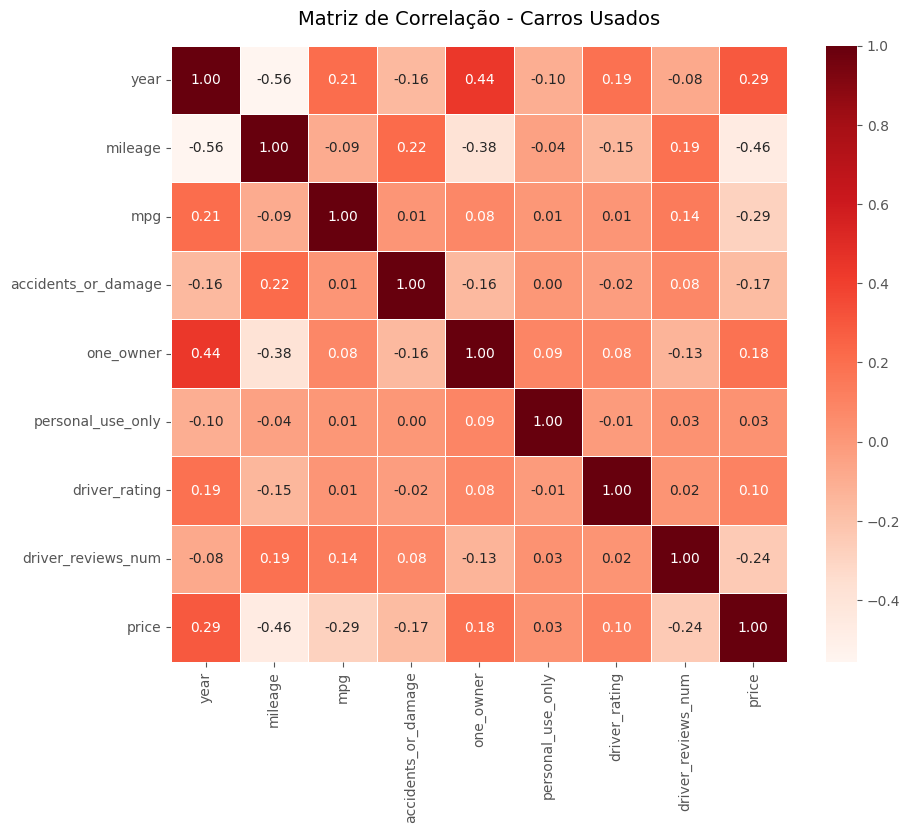

In [20]:
corr = used_car_clean[colunas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,         # mostra os valores
    fmt=".2f",          # duas casas decimais
    cmap="Reds",        # paleta em tons de vermelho
    cbar=True,          # barra lateral
    square=True,        # quadrados perfeitos
    linewidths=0.5,     # linhas entre quadrados
    linecolor="white"
)

plt.title("Matriz de Correla√ß√£o - Carros Usados", fontsize=14, pad=15)
plt.show()



### An√°lise de Correla√ß√£o com o Pre√ßo

* **Driver_reviews_num (-0.24):** Existe uma correla√ß√£o negativa, indicando que carros com maior n√∫mero de avalia√ß√µes tendem a ter pre√ßos menores. Isso pode estar relacionado ao fato de que ve√≠culos mais acess√≠veis ou populares recebem mais avalia√ß√µes.

* **One_owner (0.18):** A correla√ß√£o positiva, embora fraca, sugere que carros com apenas um dono tendem a apresentar pre√ßos um pouco maiores, possivelmente devido ao perfil dos ve√≠culos anunciados ou ao mercado espec√≠fico analisado.

* **Accidents_or_damage (-0.17):** Observa-se que ve√≠culos com hist√≥rico de acidentes ou danos tendem a ter pre√ßos mais baixos, o que √© consistente com a expectativa de desvaloriza√ß√£o nesses casos.

* **MPG (-0.27):** A correla√ß√£o negativa indica que carros com menor efici√™ncia de combust√≠vel (menor n√∫mero de milhas por gal√£o) tendem a ter pre√ßos mais altos, o que pode estar associado a ve√≠culos mais potentes ou de categorias superiores.

* **Mileage (-0.47):** Essa √© a correla√ß√£o mais forte entre as analisadas, mostrando que ve√≠culos com menor quilometragem percorrida t√™m pre√ßos significativamente mais altos. Al√©m disso, como esperado, carros mais recentes tamb√©m tendem a ser mais valorizados no mercado.


Agora que os dados j√° foram analisados, podemos salvar o dataset de treino e partir para acria√ß√£o de clusters.


In [21]:
used_car_clean.to_csv("../Dados/used_car_train.csv")


### **Resumo da An√°lise Explorat√≥ria (EDA)**

Na an√°lise explorat√≥ria, utilizamos a **mediana** para resumir os pre√ßos, devido √† presen√ßa de **outliers** que poderiam distorcer a m√©dia. Alguns insights importantes foram identificados:

* **Marca (manufacturer):** Mercedes, Lexus, GMC e BMW apresentam os maiores pre√ßos medianos, refletindo o perfil de ve√≠culos de luxo.
* **Transmiss√£o (transmission):** Carros manuais s√£o menos frequentes e apresentam uma diferen√ßa de pre√ßo leve (~1,5 mil) em rela√ß√£o aos autom√°ticos.
* **Cores:** Exterior ‚Äì **black** e **white** se destacam; Interior ‚Äì **red** indica ve√≠culos de luxo, com a cor white tamb√©m relevante.
* **Tra√ß√£o (drivetrain):** Valores medianos similares, com leve vantagem para 4WD; categoria ‚ÄúOther‚Äù tem mediana alta, mas com poucos registros.
* **Combust√≠vel (fuel_type):** Diesel apresenta maior pre√ßo mediano; gasolina, mais frequente, mediana de 26,5 mil; el√©trico n√£o √© representativo (1 registro).

---

### **Insights por vari√°vel num√©rica**

* **Ano (year):** Carros mais novos tendem a ter pre√ßos mais altos.
* **Quilometragem (mileage):** Maior quilometragem ‚Üí pre√ßo menor; menor quilometragem ‚Üí pre√ßo mais alto.
* **MPG:** Rela√ß√£o menos clara, mas extremos de consumo n√£o apresentam pre√ßos elevados.
* **Acidentes/danos (accidents_or_damage):** Ve√≠culos sem acidentes tendem a pre√ßos mais altos; com acidentes, pre√ßos menores.
* **One_owner:** Tend√™ncia de pre√ßos maiores para carros com √∫nico dono.
* **Uso pessoal (personal_use_only):** Diferen√ßa menos significativa; carros de uso pessoal apresentam maior dispers√£o de pre√ßos.
* **Driver_rating:** Correla√ß√£o positiva com pre√ßo.
* **Driver_reviews_num:** Correla√ß√£o negativa; carros com muitas avalia√ß√µes tendem a ter pre√ßos menores.

---

### **Correla√ß√£o com o pre√ßo**

* **Mileage (-0.47):** Quanto menor a quilometragem, maior o pre√ßo (maior correla√ß√£o observada).
* **MPG (-0.27):** Menor efici√™ncia ‚Üí pre√ßo maior.
* **Driver_reviews_num (-0.24):** Mais avalia√ß√µes ‚Üí pre√ßo menor.
* **Accidents_or_damage (-0.17):** Hist√≥rico de acidentes ‚Üí pre√ßo menor.
* **One_owner (0.18):** Carro com √∫nico dono tende a valor ligeiramente maior.

---

### **Conclus√£o**

A EDA indica que **pre√ßo √© positivamente influenciado por ano de fabrica√ß√£o, boa avalia√ß√£o e √∫nico dono**, e **negativamente influenciado por quilometragem, acidentes/danos e n√∫mero de avalia√ß√µes**. Outras vari√°veis, como consumo e uso pessoal, t√™m efeito mais fraco.

Agora que os dados foram explorados e entendidos, o pr√≥ximo passo ser√° **salvar o dataset de treino e aplicar t√©cnicas multivariadas**, come√ßando pela **cria√ß√£o de clusters**.

